## Bank Churn Prediction Project on Neural Networks
Background and Context

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

Objective

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

Data Dictionary

    CustomerId: Unique ID which is assigned to each customer
    Surname: Last name of the customer 
    CreditScore: It defines the credit history of the customer.  
    Geography: A customer’s location    
    Gender: It defines the Gender of the customer   
    Age: Age of the customer     
    Tenure: Number of years for which the customer has been with the bank
    NumOfProducts: It refers to the number of products that a customer has purchased through the bank.
    Balance: Account balance
    HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.
    EstimatedSalary: Estimated salary 
    isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )
    Excited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 

                    0=No ( Customer did not leave the bank )

                    1=Yes ( Customer left the bank 

In [ ]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import warnings

warnings.filterwarnings("ignore")
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [ ]:
#%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")


# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
)


# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import metrics


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score



In [ ]:
# Mount Google drive to access the dataset (monkeys_dataset.zip)
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
loan = pd.read_csv("/content/drive/MyDrive/Churn.csv")

In [ ]:
loan

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

### 10 000 rows of data with 14 columns/features

In [ ]:
loan.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

### Conclusions 

Mean credit score is 650.5min. 350 max 850.  

Mean age 38.9 years with range from 18 to 92 years.

Mean tenure is 5 years with minim 0 and Maximum 10 years.

Balance mean 76000 with min. 0 and max. approximately 250000. 

Number of products mean 1.5 with minimum 1 and max 4.

Estimated salary mean 100000 min 11 max 200000.


In [ ]:
loan.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

###  Nomissing values. 

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Note: Geography and gender will need to be encoded. 

### Checking for numbers ofunique values for each of the feature

In [ ]:
for col in loan.columns:
    print("Number of unique values in ", col, len(loan[col].unique()))


Number of unique values in  RowNumber 10000
Number of unique values in  CustomerId 10000
Number of unique values in  Surname 2932
Number of unique values in  CreditScore 460
Number of unique values in  Geography 3
Number of unique values in  Gender 2
Number of unique values in  Age 70
Number of unique values in  Tenure 11
Number of unique values in  Balance 6382
Number of unique values in  NumOfProducts 4
Number of unique values in  HasCrCard 2
Number of unique values in  IsActiveMember 2
Number of unique values in  EstimatedSalary 9999
Number of unique values in  Exited 2


In [ ]:
# customized boxplot+histogram with mean and median values
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="yellow")
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")

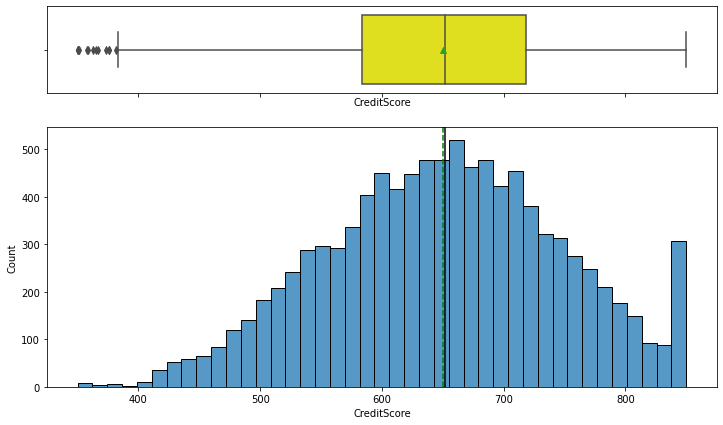

In [ ]:
histogram_boxplot(loan, "CreditScore")

### Conlcusions
Mean is close to median so distribution is close to normal distibtin in that respect, for a given dataset. 

The max credit score available is 850 so the distribtion cannot have the same tail as on the left side. Therefore the weird behavior of histogram at 850 the max credit score. 

Notice few outliers with very low score.

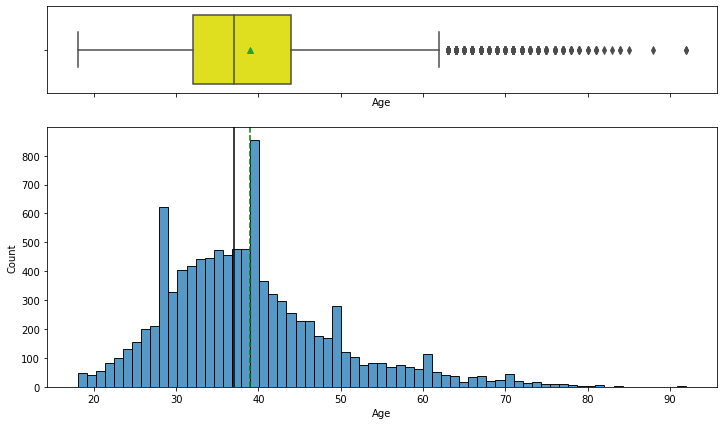

In [ ]:
histogram_boxplot(loan, "Age")

### Conclusion: Several outliers above age 60. 

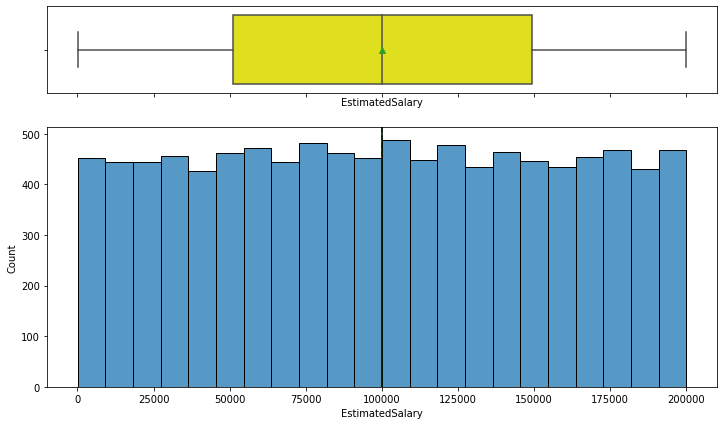

In [ ]:
histogram_boxplot(loan, "EstimatedSalary")

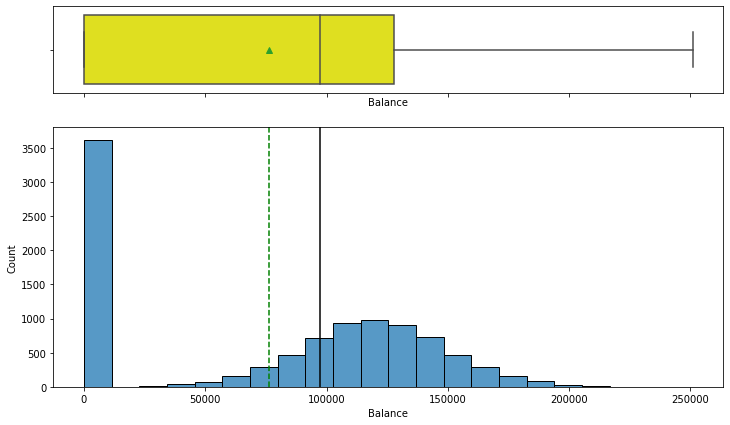

In [ ]:
histogram_boxplot(loan, "Balance")

### Note
There is a relatively large grop of customers who have zero balance.This causes the change of the overall distrbution. But also since these is a 3500+ cusstomers gop I will later check this group separately. I 
do not tihnk I can drop this group as it is around 1/3 of data set and the infomration about this customers might help understand the data set. 

### Barplots and detailed distributions

In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

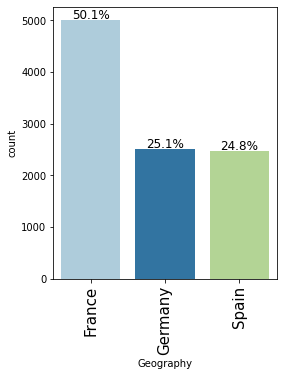

In [ ]:
labeled_barplot(loan, "Geography", perc=True)

### Conclusion:
Location of customers: 50 % from France 25% from Germany 25 % from Spain.

### Note
But in my opinion the data set is not large enough to model separately each of the subgroup. 

According to literature the more important factor is the number of data points. 
(Smaller dataset would only be enough if I have reason to reduce features). 

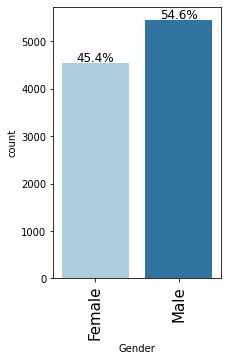

In [ ]:
labeled_barplot(loan, "Gender", perc=True)

### Conclusion: Dataset is approximately balanced with respect to gender

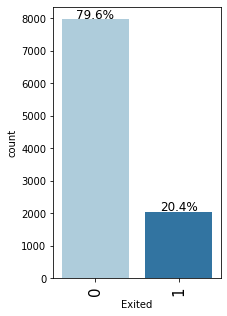

In [ ]:
labeled_barplot(loan, "Exited", perc=True)

### 20.4% of customers left the bank. It is an imbalanced dataset and might require the augmentation of the data subset for theminority class in order to imporve the precision.

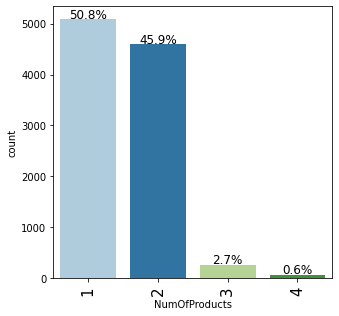

In [ ]:
labeled_barplot(loan, "NumOfProducts", perc=True)

### Conclusion about the number of products:
Less than 3% of customers have 3 or 4 products.

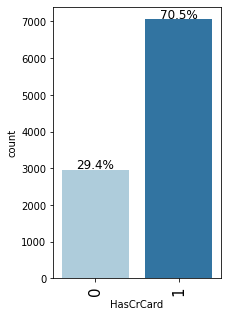

In [ ]:
labeled_barplot(loan, "HasCrCard", perc=True)

### Conclusion  about the Credit card possession
30% of customers have no credit card.

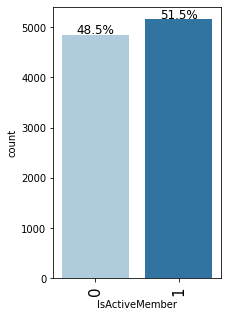

In [ ]:
labeled_barplot(loan, "IsActiveMember", perc=True)

### Conclusion about the customers service use habits
51.5% of customers are regularly using the services. 

In [ ]:
import seaborn as sns

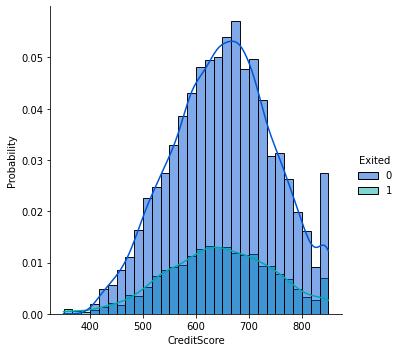

In [ ]:
sns.displot(
    loan,
    x="CreditScore",
    hue="Exited",
    bins=30,
    palette="winter",
    kde=True,
    stat="probability",
)

### Conclusion about the Credit scores for the customers who stay and those who exit. 
Credit score distribution among the customers who stay or leave is similar. No striking differences.

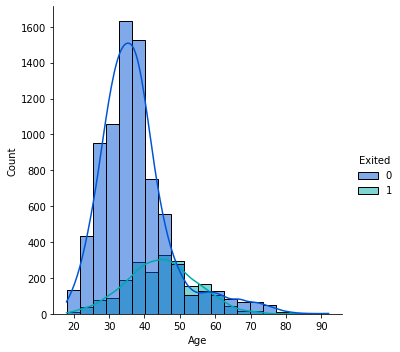

In [ ]:
sns.displot(
    loan, x="Age", hue="Exited", bins=20, palette="winter", kde=True,
)

### Conclusion about the Age for the groups of customers who stay and exit:
On the fist view the distribution of age for customers who left the bank seems to suggest that more mature customers leave the bank. A  question is if it is related only wiht age or also with the tenure of the customers. 

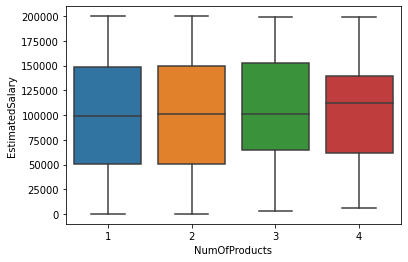

In [ ]:
sns.boxplot(x="NumOfProducts", y="EstimatedSalary", data=loan)

### Conclusion for the salary of customers who have access to diferent bank products
Number of products a customers have does not seem to strongly depend on salary, except for 4 products (average salary higher). 

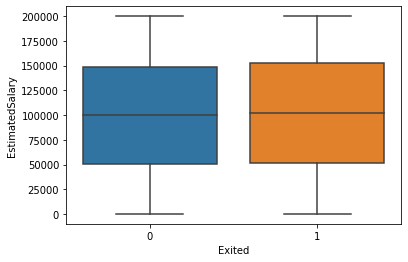

In [ ]:
sns.boxplot(x="Exited", y="EstimatedSalary", data=loan)

### Conclusion about salary of customers who stay and exit 
The customers who stay and who leave have similar salary range/mean.

Before proceeding to more detailed study of the data I plot the pairplot and correlations

In [ ]:


sns.pairplot(loan, hue="Exited")



Output hidden; open in https://colab.research.google.com to view.

### Conclusion: Dropping the first 3 columns as they do not bring anything to the analysis or modeling of the data.

In [ ]:
data = loan.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

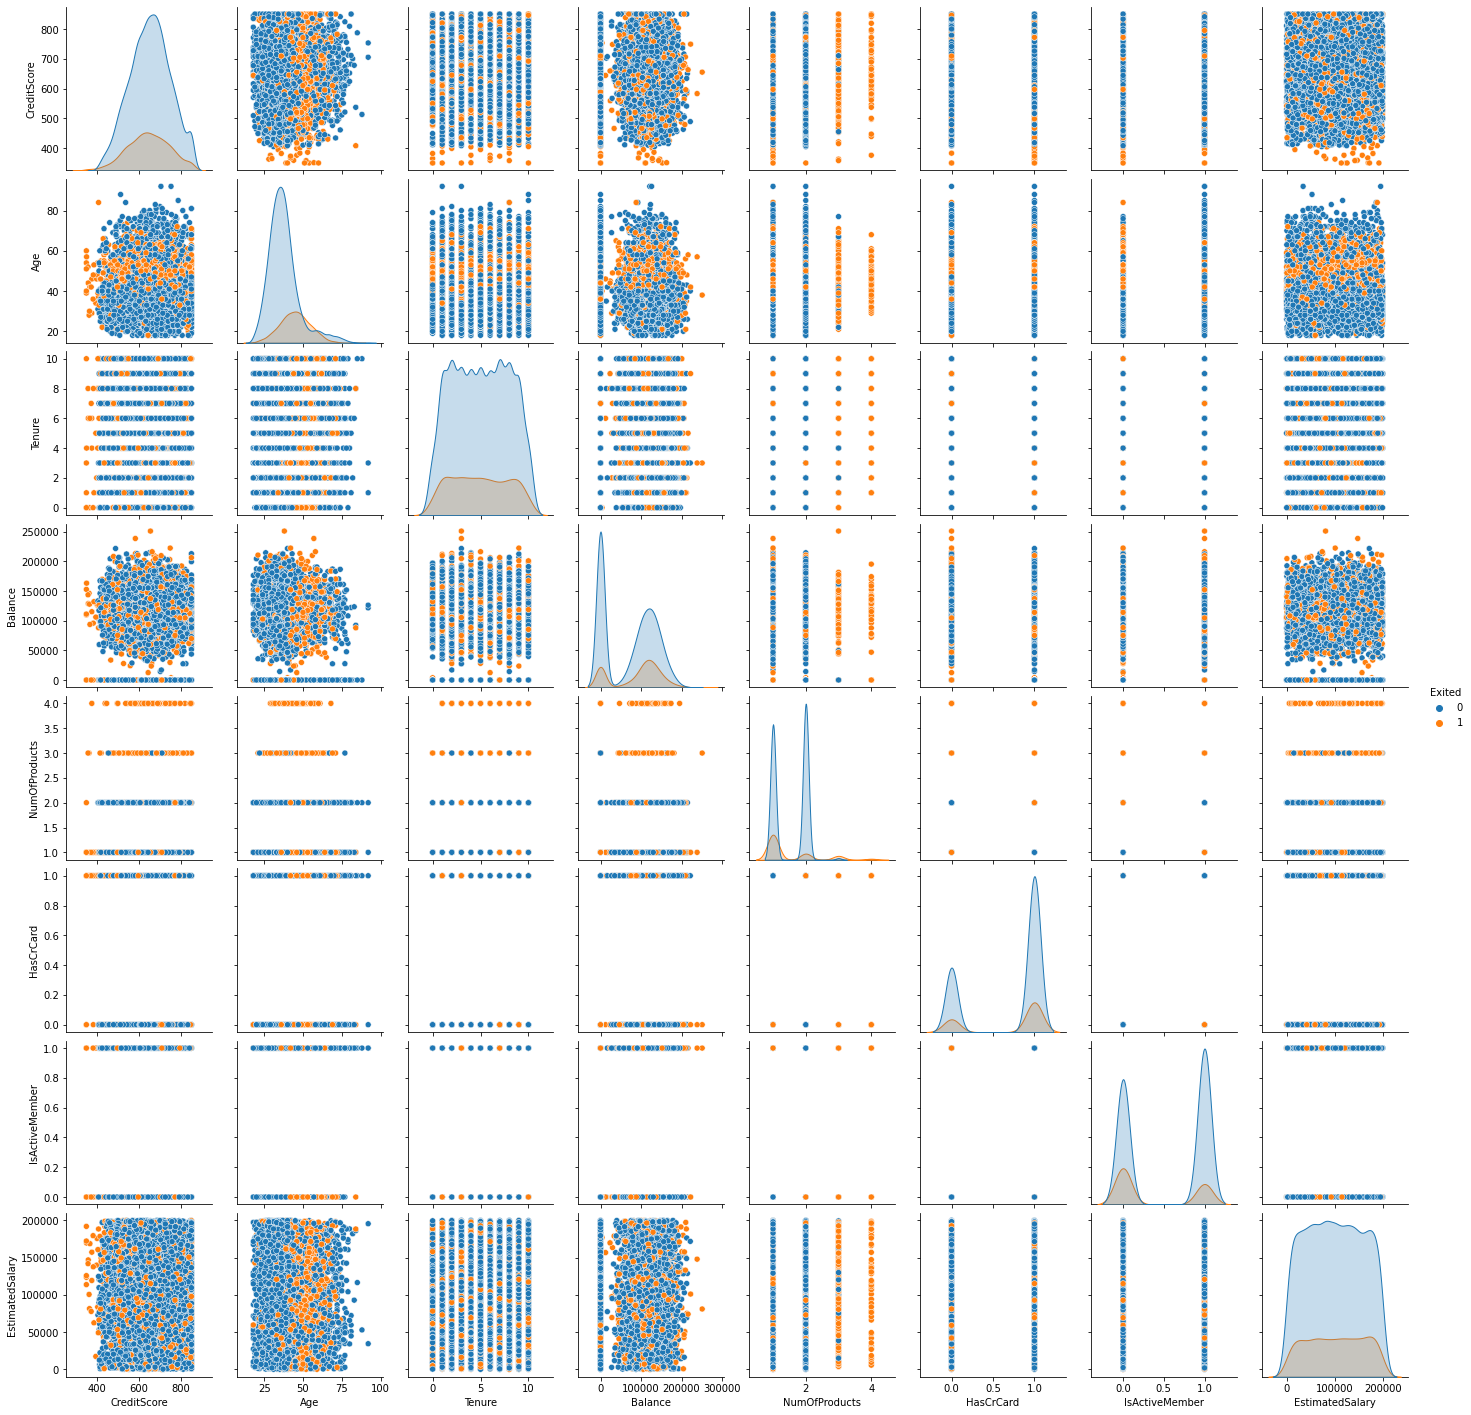

In [ ]:
sns.pairplot(data, hue="Exited")

### Conclusion 

One can see the concentration of the age distribution of "exited" customers around the age  of 50 years.

A large number of excited custmers have 3 or 4 products.

One unusual thing is that there is a group of exited customers that seems to have low credit score (the lowest) 
with relatively high salary. 

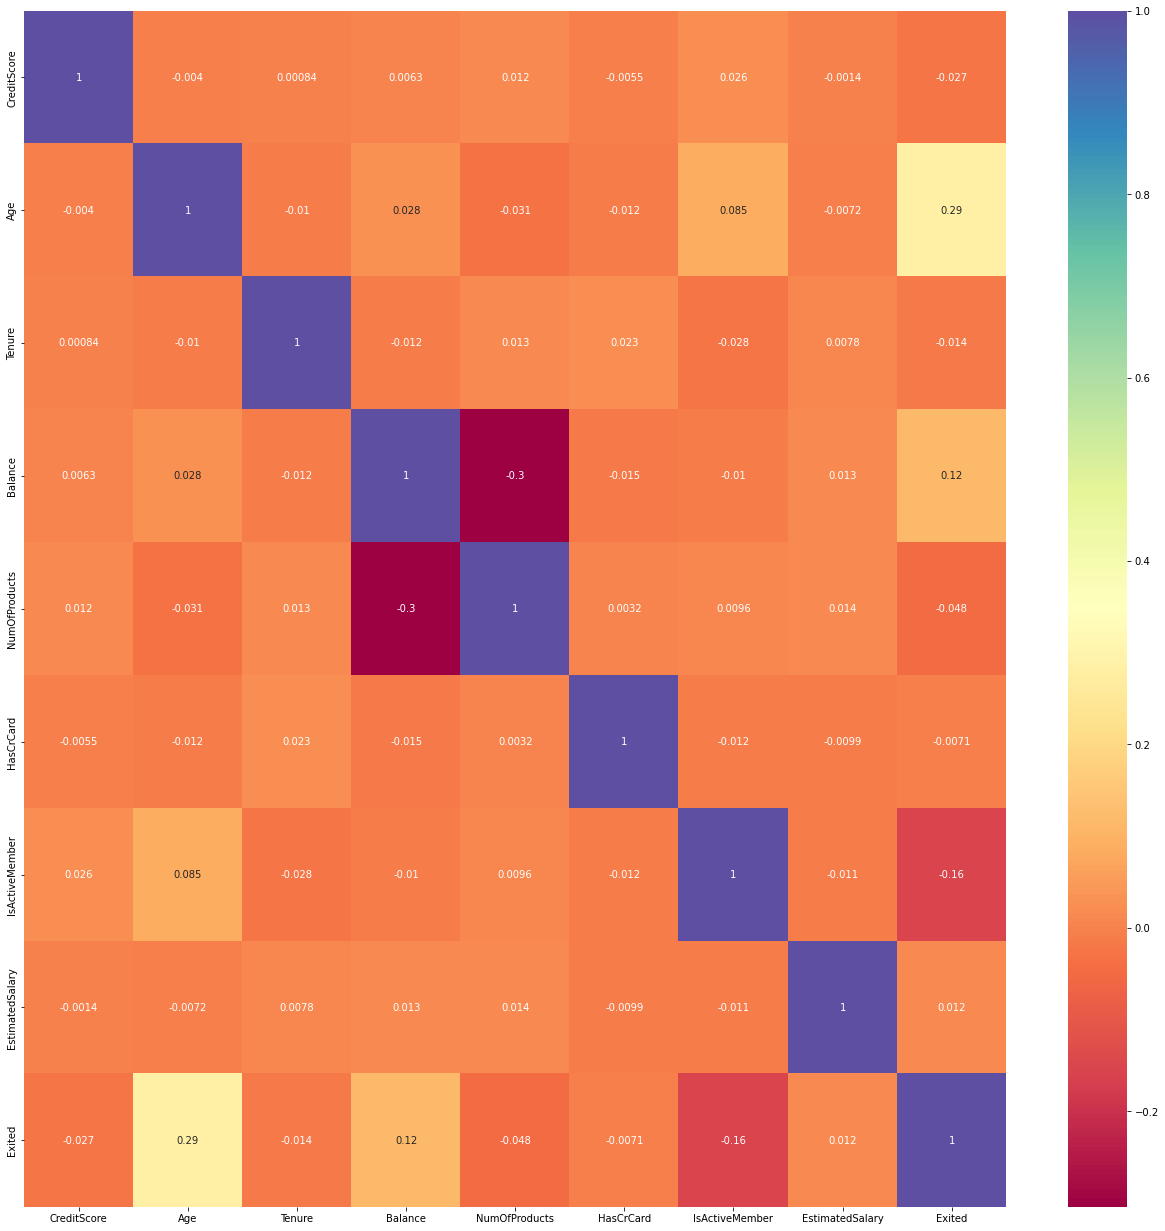

In [ ]:
plt.figure(figsize=(22, 22))
sns.heatmap(data.corr(), annot=True, cmap="Spectral")

### Conclusion: 

there does not seemtobe large correlation. The only possible - weak correlaiton is for number of products and balance. It is understandable because the more money a person has themore products (for example credit cards, loans, stock investing options) one can be offered by the banking institution. 


### Now I will check the mean and median for different subgroups:  

In [ ]:
data.groupby("NumOfProducts")["Age"].mean()

NumOfProducts
1    39.673092
2    37.753595
3    43.195489
4    45.683333
Name: Age, dtype: float64

### Conclusion: 
those customers who have 3 and 4 products - are older. 

In [ ]:
data.groupby("NumOfProducts")["Tenure"].mean()

NumOfProducts
1    4.974626
2    5.051852
3    5.003759
4    5.300000
Name: Tenure, dtype: float64

### Conclusion:
Customers for different product number group have similar tenure length.

In [ ]:
data.groupby("NumOfProducts")["EstimatedSalary"].mean()

NumOfProducts
1     99487.256851
2    100452.012821
3    104318.130564
4    104763.723333
Name: EstimatedSalary, dtype: float64

### Conclusion:
Customers for different product number group have similar average salary

In [ ]:
data.groupby("NumOfProducts")["Balance"].mean()

NumOfProducts
1    98551.870614
2    51879.145813
3    75458.328195
4    93733.135000
Name: Balance, dtype: float64

### Conclusion:
There are some differences in Balance for different customers whohave different number of products but i am not sure what it might mean.

In [ ]:
data.groupby("NumOfProducts")["CreditScore"].mean()

NumOfProducts
1    649.120968
2    652.188671
3    648.105263
4    653.583333
Name: CreditScore, dtype: float64

### Conclusion:
Customers for different product number groups have no significat differences for average credit score.

In [ ]:
data.groupby("NumOfProducts")["CreditScore"].median()

NumOfProducts
1    651.0
2    653.0
3    650.0
4    643.0
Name: CreditScore, dtype: float64

### Conclusion:
Slightly decreasing trend for median of credit score wih increasing number of products. I do not think it is significant at this point

In [ ]:
data.groupby("NumOfProducts")["Balance"].median()

NumOfProducts
1    111886.035
2         0.000
3     95973.935
4    116808.195
Name: Balance, dtype: float64

### Note: clients who have 2 products have median value for Balance -zero. 
This group had already the lowers average balance and is visible on the histogram plot above.

In [ ]:
data.groupby("NumOfProducts")["EstimatedSalary"].median()

NumOfProducts
1     99226.830
2    100738.855
3    101046.885
4    112163.105
Name: EstimatedSalary, dtype: float64

### Conclusion: 
Increasing trend for median Estimated salary with respect to number of products.

## Deep dive:

1) I will check for the customers who have exited and those who - stay  separately. 

2) I will check the correlations between the high salary low credit score group. 

3) I will check number of products (1, 2 or 3 and 4)
    

In [ ]:
exited = data[data["Exited"] == 1]

### Note: I have checked pairplot of the "Exite" group with respect to number ofproducts and there was nothing unusual.I deleted the plot as these are big plots that take up space.

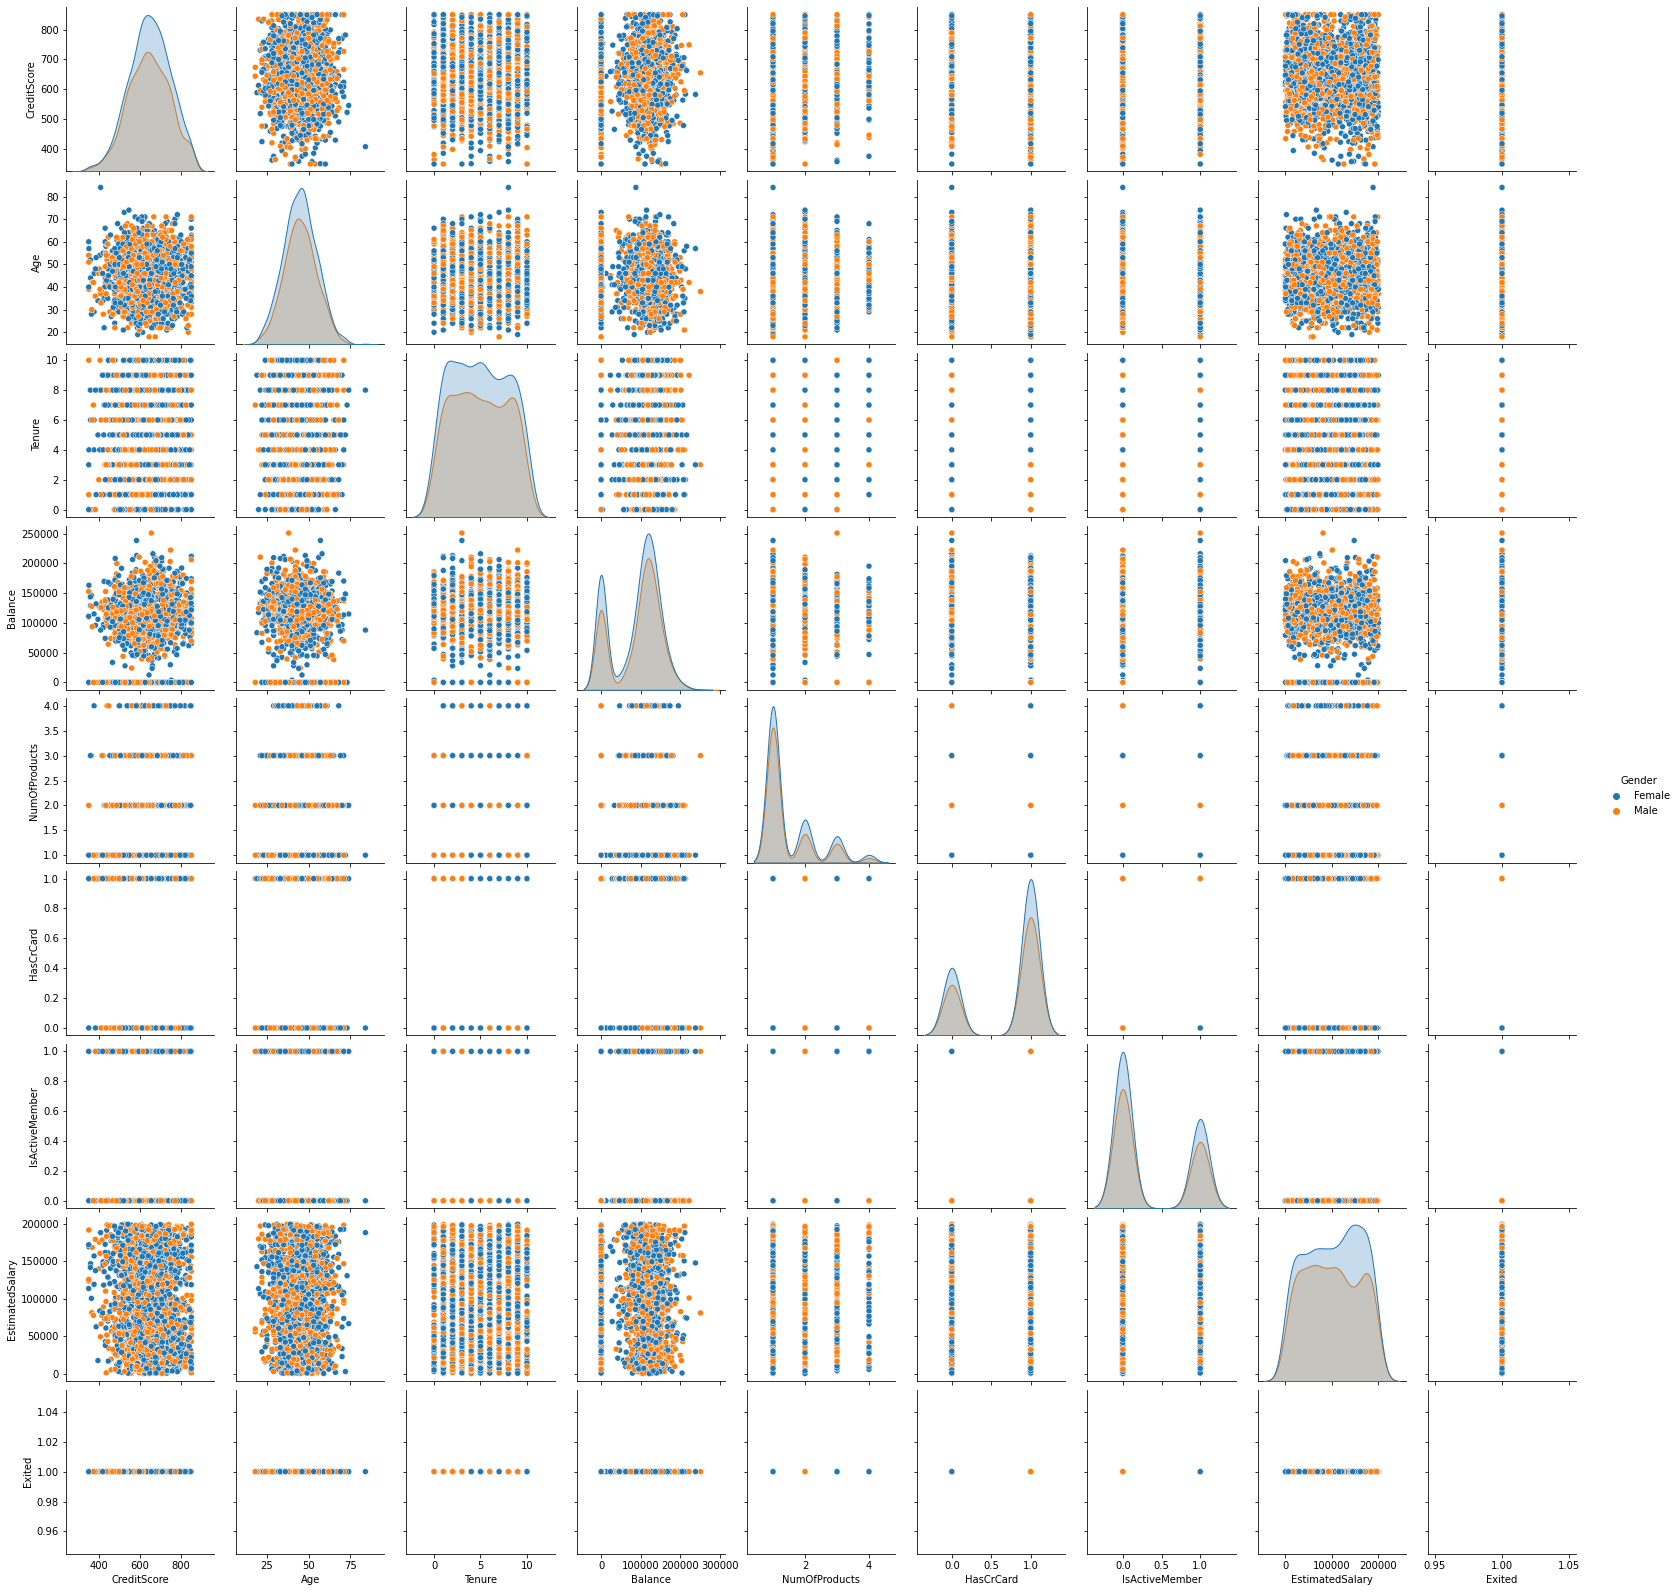

In [ ]:
sns.pairplot(exited, hue="Gender")

### Plot of the data for the exit customers does not reveal anything interesting with respect to Gender. 
I will study it in a littlemore detail.

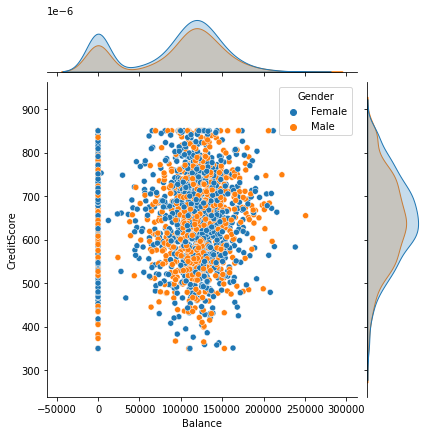

In [ ]:
g = sns.jointplot(
    data=exited, x="Balance", y="CreditScore", hue="Gender"
)



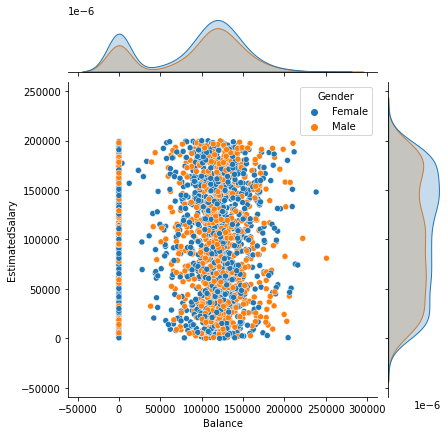

In [ ]:
g = sns.jointplot(
    data=exited, x="Balance", y="EstimatedSalary", hue="Gender"
)


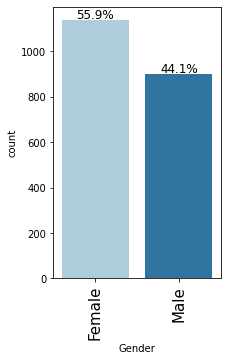

In [ ]:
labeled_barplot(exited, "Gender", perc=True)

### Conclusion
56% percent of exit customers are female customers. the difference is 11 % for the excit customer group when for the over all group the minority are the femalecustomer (45%).



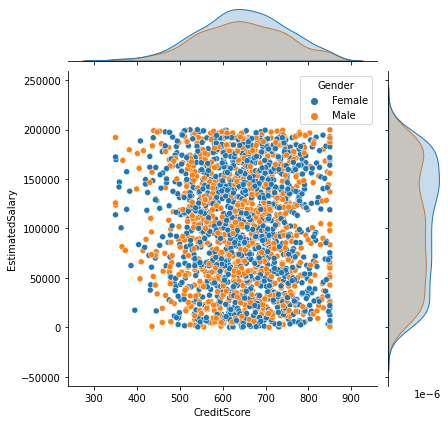

In [ ]:
g = sns.jointplot(
    data=exited, x="CreditScore", y="EstimatedSalary", hue="Gender"
)


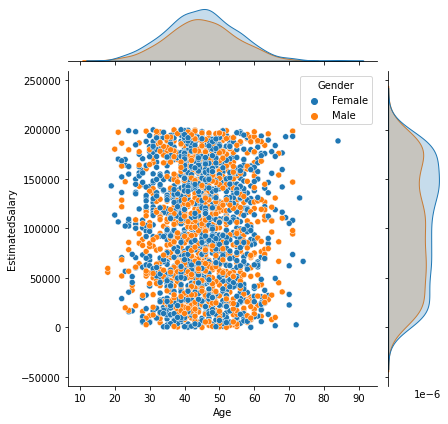

In [ ]:
g = sns.jointplot(
    data=exited, x="Age", y="EstimatedSalary", hue="Gender"
)


I do not see any visible differences in the female and male customers for the exit group.

I move on to check for bivariate distributions with respect to other categorical variablesfor the exit group.

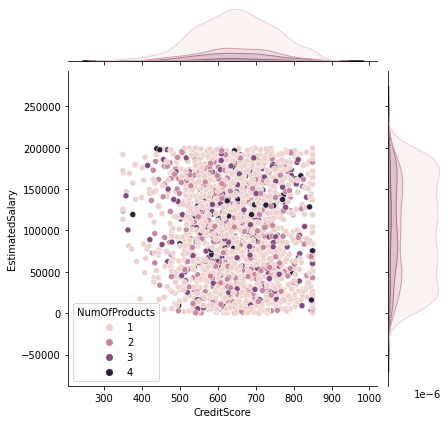

In [ ]:
g = sns.jointplot(
    data=exited, x="CreditScore", y="EstimatedSalary", hue="NumOfProducts"
)


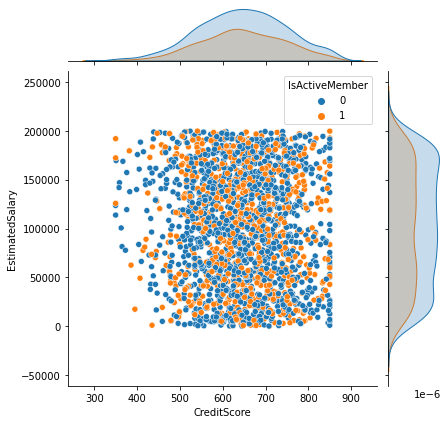

In [ ]:
g = sns.jointplot(
    data=exited, x="CreditScore", y="EstimatedSalary", hue="IsActiveMember"
)


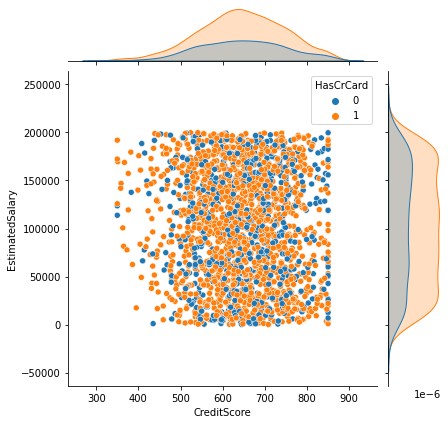

In [ ]:
g = sns.jointplot(
    data=exited, x="CreditScore", y="EstimatedSalary", hue="HasCrCard"
)


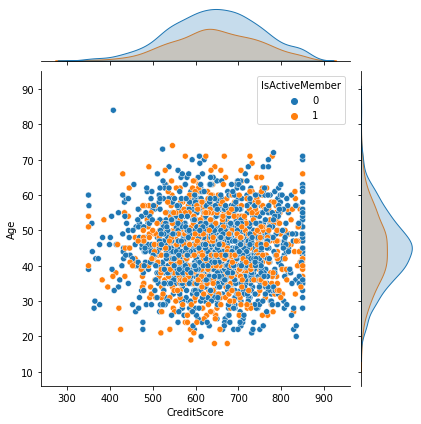

In [ ]:
g = sns.jointplot(
    data=exited, x="CreditScore", y="Age", hue="IsActiveMember"
)


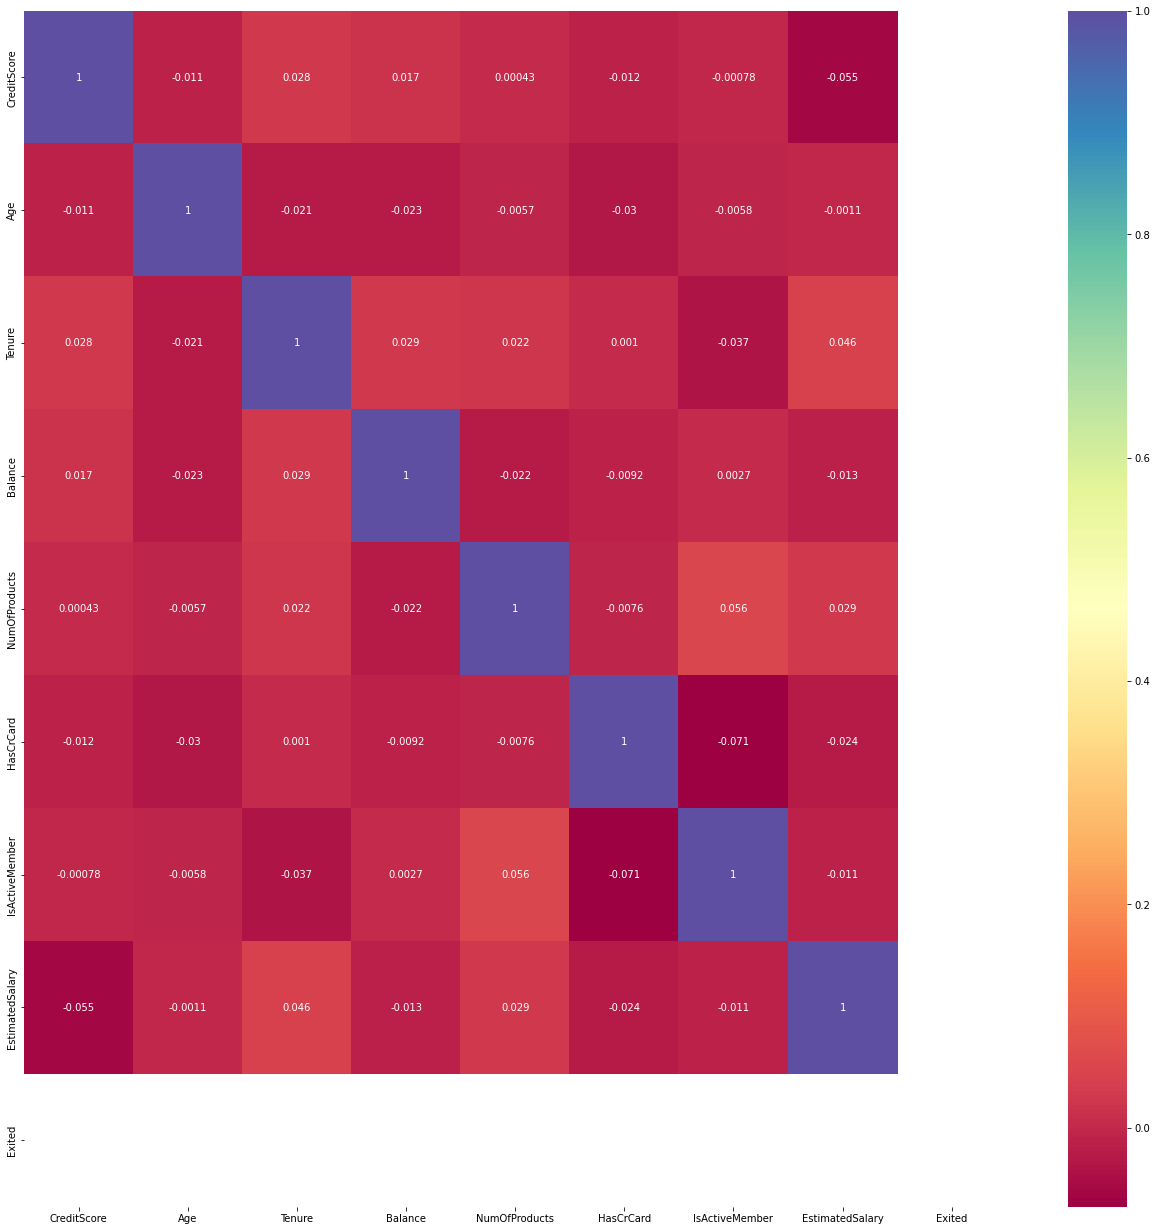

In [ ]:
plt.figure(figsize=(22, 22))
sns.heatmap(exited.corr(), annot=True, cmap="Spectral")

### Conclusion on correlation between variables:
I really do not see anything here. I will quicl check the zero balance group of customers as this one is the onethat stood out.

In [ ]:
zerob = data[data["Balance"] == 0]

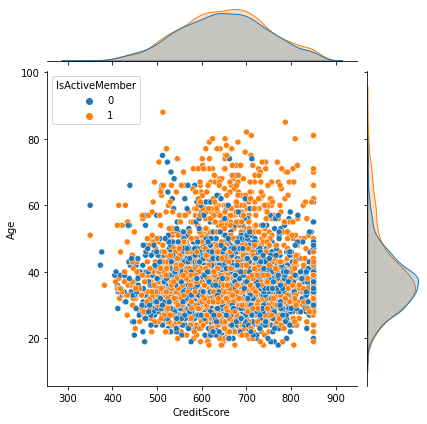

In [ ]:
g = sns.jointplot(
    data=zerob, x="CreditScore", y="Age", hue="IsActiveMember"
)


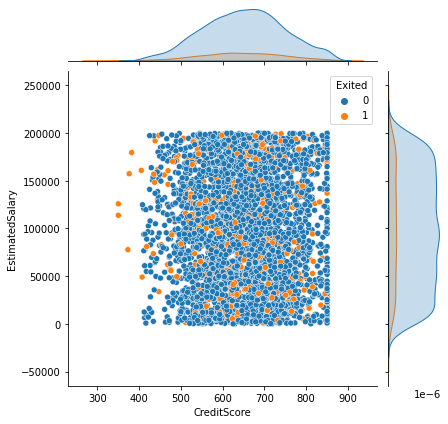

In [ ]:
g = sns.jointplot(
    data=zerob, x="CreditScore", y="EstimatedSalary", hue="Exited"
)


### Conclusion:
Those with zero balance do not have anything unusual in the distributions - I have checked several fetaures and nothing stands out.Except maybe that I would assume zero balance means some different salary distribution. But it seems tobe not the case. 

### Model preparation: I split the data into features ( matrix X) and  vector y will contain the target variable.

In [ ]:
X = data.drop(labels=["Exited"], axis=1)
y = data["Exited"]

### Model preparation: I encode the categorical data using Label encoder from sklearn and get dummies functions.

In [ ]:
label1 = LabelEncoder()
X["Geography"] = label1.fit_transform(X["Geography"])

In [ ]:
label = LabelEncoder()
X["Gender"] = label.fit_transform(X["Gender"])
X.head()

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619          0       0   42       2       0.00              1   
1          608          2       0   41       1   83807.86              1   
2          502          0       0   42       8  159660.80              3   
3          699          0       0   39       1       0.00              2   
4          850          2       0   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1        101348.88  
1          0               1        112542.58  
2          1               0        113931.57  
3          0               0         93826.63  
4          1               1         79084.10

In [ ]:
X = pd.get_dummies(X, drop_first=True, columns=["Geography"])
X.head()

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       0   42       2       0.00              1          1   
1          608       0   41       1   83807.86              1          0   
2          502       0   42       8  159660.80              3          1   
3          699       0   39       1       0.00              2          0   
4          850       0   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Geography_1  Geography_2  
0               1        101348.88            0            0  
1               1        112542.58            0            1  
2               0        113931.57            0            0  
3               0         93826.63            0            0  
4               1         79084.10            0            1

Split the data into test and train

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

### Model preparation: Scaling data using standard scaler:

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Building Neural networks using Keras
### Model 1 (128-1) 

In [ ]:
import keras  # importing keras library
from keras.models import Sequential  # importing the Sequential Model
from keras.layers import Dense  # importing Dense layer

In [ ]:
model = Sequential()
model.add(Dense(X.shape[1], activation="relu", input_dim=X.shape[1]))
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(X_train, y_train.to_numpy(), batch_size=300, epochs=100, verbose=1)

Epoch 1/100
27/27 [==============================] - 1s 2ms/step - loss: 0.6699 - accuracy: 0.5906
Epoch 2/100
27/27 [==============================] - 0s 2ms/step - loss: 0.5490 - accuracy: 0.7962
Epoch 3/100
27/27 [==============================] - 0s 2ms/step - loss: 0.5030 - accuracy: 0.7976
Epoch 4/100
27/27 [==============================] - 0s 2ms/step - loss: 0.4703 - accuracy: 0.8079
Epoch 5/100
27/27 [==============================] - 0s 2ms/step - loss: 0.4501 - accuracy: 0.8125
Epoch 6/100
27/27 [==============================] - 0s 2ms/step - loss: 0.4387 - accuracy: 0.8144
Epoch 7/100
27/27 [==============================] - 0s 2ms/step - loss: 0.4303 - accuracy: 0.8151
Epoch 8/100
27/27 [==============================] - 0s 2ms/step - loss: 0.4231 - accuracy: 0.8191
Epoch 9/100
27/27 [==============================] - 0s 2ms/step - loss: 0.4164 - accuracy: 0.8219
Epoch 10/100
27/27 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8246
Epoch 11/

### Conclusion:
Accuracy on train set 0.86

In [ ]:

model.evaluate(X_test, y_test.to_numpy())


63/63 [==============================] - 0s 1ms/step - loss: 0.3488 - accuracy: 0.8590


[0.348802387714386, 0.859000027179718]

### Comment: 
Accuracy on test set 0.86

In [ ]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

In [ ]:
confusion_matrix(y_test, classes_x)

array([[1593,    0],
       [ 407,    0]])

In [ ]:
y_predicted = model.predict(X_test)
# y_predicted for test transformation
y_pred_trans = []
for pred in y_predicted:
    if pred > 0.5:
        y_pred_trans.append(1)
    else:
        y_pred_trans.append(0)

y_pred_trans[0:10]

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

Random Chance Prediction AUROC: 0.5
One Neuron Network Prediction AUROC: 0.7130134757253401


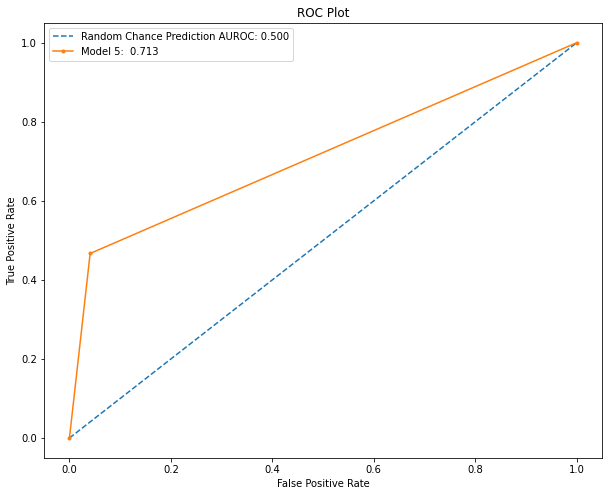

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

r_probs = [0 for _ in range(len(y_test))]
# Calculate the AUROC
r_auc = roc_auc_score(y_test, r_probs)
on_auc = roc_auc_score(y_test, y_pred_trans)
print("Random Chance Prediction AUROC: " + str(r_auc))
print("One Neuron Network Prediction AUROC: " + str(on_auc))
r_fpr, r_tpr, threshold = roc_curve(y_test, r_probs)
on_fpr, on_tpr, threshold = roc_curve(y_test, y_pred_trans)
threshold[0:10]

from matplotlib.pyplot import figure

plt.figure(figsize=(10, 8))
plt.plot(
    r_fpr, r_tpr, linestyle="--", label="Random Chance Prediction AUROC: %0.3f" % r_auc
)
plt.plot(on_fpr, on_tpr, marker=".", label="Model 5:  %0.3f" % on_auc)

# TITLE
plt.title("ROC Plot")
# Axis Label
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# Legend
plt.legend()
# show plot
plt.show()

### Conclusions:

I have plotted the ROC curve and the confusion matrix.

There is no overfitting.  

I do not consider this a good model as accuracy on 0.86 meanswe do not perform mch better than if one throws away all of the relevant information and the minority class.

Accuracy on both the test and train is 0.86.

## Model 2  (128-64-64-32-1) - with added more  dense layers.

In [ ]:
model2 = Sequential()
model2.add(Dense(X.shape[1], activation="relu", input_dim=X.shape[1]))
model2.add(Dense(128, activation="relu", kernel_initializer="he_normal"))
model2.add(Dense(64, activation="relu", kernel_initializer="he_normal"))
model2.add(Dense(64, activation="relu", kernel_initializer="he_normal"))
model2.add(Dense(32, activation="relu", kernel_initializer="he_normal"))
model2.add(Dense(1, activation="sigmoid"))

In [ ]:
model2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
model2.fit(X_train, y_train.to_numpy(), batch_size=300, epochs=300, verbose=1)

Epoch 1/300
27/27 [==============================] - 1s 4ms/step - loss: 0.5244 - accuracy: 0.7611
Epoch 2/300
27/27 [==============================] - 0s 4ms/step - loss: 0.4470 - accuracy: 0.8034
Epoch 3/300
27/27 [==============================] - 0s 5ms/step - loss: 0.4288 - accuracy: 0.8138
Epoch 4/300
27/27 [==============================] - 0s 4ms/step - loss: 0.4132 - accuracy: 0.8226
Epoch 5/300
27/27 [==============================] - 0s 4ms/step - loss: 0.3998 - accuracy: 0.8280
Epoch 6/300
27/27 [==============================] - 0s 3ms/step - loss: 0.3881 - accuracy: 0.8366
Epoch 7/300
27/27 [==============================] - 0s 4ms/step - loss: 0.3761 - accuracy: 0.8438
Epoch 8/300
27/27 [==============================] - 0s 4ms/step - loss: 0.3659 - accuracy: 0.8486
Epoch 9/300
27/27 [==============================] - 0s 3ms/step - loss: 0.3594 - accuracy: 0.8496
Epoch 10/300
27/27 [==============================] - 0s 3ms/step - loss: 0.3550 - accuracy: 0.8522
Epoch 11/

In [ ]:
model2.evaluate(X_test, y_test.to_numpy())


63/63 [==============================] - 0s 2ms/step - loss: 1.5145 - accuracy: 0.8025


[1.5145057439804077, 0.8025000095367432]

### Conclusion:
Example of overfitting - accuracy on train set 0.99 but on the train test 0.8. So this model is worse than a simplemodel above. 

## For comparison to neural networks precision - several simpler classifiers from sklearn

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
def stratified_cv(X, y, clf_class, shuffle=True, **kwargs):
    stratified_k_fold = StratifiedKFold().split(X, y)
    y_pred = y.copy()
    for ii, jj in stratified_k_fold:
        Xtrain, Xtest = X.iloc[ii], X.iloc[jj]
        ytrain = y.iloc[ii]
        clf = clf_class(**kwargs)
        clf.fit(X_train, y_train)
        y_pred.iloc[jj] = clf.predict(Xtest)
    return y_pred

In [ ]:
print(
    "Gradient Boosting Classifier:  {:.2f}".format(
        metrics.accuracy_score(
            y, stratified_cv(X, y, ensemble.GradientBoostingClassifier)
        )
    )
)


print(
    "Random Forest Classifier:      {:.2f}".format(
        metrics.accuracy_score(y, stratified_cv(X, y, ensemble.RandomForestClassifier))
    )
)

print(
    "K Nearest Neighbor Classifier: {:.2f}".format(
        metrics.accuracy_score(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))
    )
)

print(
    "Logistic Regression:           {:.2f}".format(
        metrics.accuracy_score(y, stratified_cv(X, y, linear_model.LogisticRegression))
    )
)
#print(
#    "XGBoost Classifier:           {:.2f}".format(
#        metrics.accuracy_score(y, stratified_cv(X, y, XGBClassifier))
#    )
#)

Gradient Boosting Classifier:  0.80
Random Forest Classifier:      0.46
K Nearest Neighbor Classifier: 0.60
Logistic Regression:           0.20


In [ ]:
print(
    "Gradient Boosting Classifier:\n {}\n".format(
        metrics.classification_report(
            y, stratified_cv(X, y, ensemble.GradientBoostingClassifier)
        )
    )
)

print(
    "Random Forest Classifier:\n {}\n".format(
        metrics.classification_report(
            y, stratified_cv(X, y, ensemble.RandomForestClassifier)
        )
    )
)

print(
    "K Nearest Neighbor Classifier:\n {}\n".format(
        metrics.classification_report(
            y, stratified_cv(X, y, neighbors.KNeighborsClassifier, n_neighbors=11)
        )
    )
)

print(
    "Logistic Regression:\n {}\n".format(
        metrics.classification_report(
            y, stratified_cv(X, y, linear_model.LogisticRegression)
        )
    )
)

#print(
#    "XGBoost Classifier:\n {}\n".format(
#        metrics.classification_report(y, stratified_cv(X, y, XGBClassifier))
#    )
#)

Gradient Boosting Classifier:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      7963
           1       0.00      0.00      0.00      2037

    accuracy                           0.80     10000
   macro avg       0.40      0.50      0.44     10000
weighted avg       0.63      0.80      0.71     10000


Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.76      0.59      0.66      7963
           1       0.14      0.25      0.18      2037

    accuracy                           0.52     10000
   macro avg       0.45      0.42      0.42     10000
weighted avg       0.63      0.52      0.56     10000


K Nearest Neighbor Classifier:
               precision    recall  f1-score   support

           0       0.80      0.87      0.84      7963
           1       0.25      0.17      0.20      2037

    accuracy                           0.73     10000
   macro avg       0.53      0.52   

### Conclusion 
standard classifiersincluding XGBoost - get accuracy around 0.8 so the basic neural network model (model 1) performed better. As one can see the sklearn classifiers without hypertuning do not perform very well on this data set. 

##  Study the model properties  in detail and check more carefully for other metrics.

### Model 3 (64-32-1) without dropout layers

In [ ]:
import keras  # importing keras library
from keras.models import Sequential  # importing the Sequential Model
from keras.layers import Dense  # importing Dense layer


def build_model():
    ## Initializing the ANN

    model = Sequential()
    input_layer = Dense(
        64,
        input_shape=(X_train.shape[1],),
        activation="relu",
        kernel_initializer="he_normal",
    )
    model.add(input_layer)  #
    hidden_layer = Dense(32, activation="relu", kernel_initializer="he_normal")
    model.add(hidden_layer)
    output_layer = Dense(1, activation="sigmoid")
    model.add(output_layer)

    model.compile(
        loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]
    )  
    return model

In [ ]:
model2 = build_model()
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                768       
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Definign the number of epochs
EPOCHS = 100
# fitting the model
history = model2.fit(X_train, y_train, epochs=EPOCHS, validation_split=0.2, verbose=1,)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4439 - accuracy: 0.8095 - val_loss: 0.3952 - val_accuracy: 0.8369
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3829 - accuracy: 0.8428 - val_loss: 0.3765 - val_accuracy: 0.8456
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3621 - accuracy: 0.8495 - val_loss: 0.3610 - val_accuracy: 0.8519
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3509 - accuracy: 0.8533 - val_loss: 0.3573 - val_accuracy: 0.8494
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3432 - accuracy: 0.8550 - val_loss: 0.3614 - val_accuracy: 0.8456
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3374 - accuracy: 0.8611 - val_loss: 0.3589 - val_accuracy: 0.8519
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3331 - accuracy: 0.8619 - val_loss: 0.3574 - val_accuracy: 0.8487

Accuracy on the train test 0.91

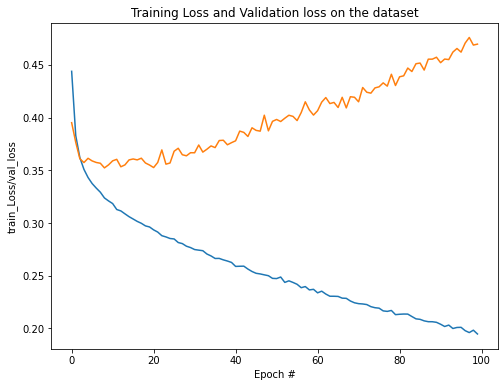

In [ ]:
N = 100
import pylab as plt

plt.figure(figsize=(8, 6))
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")

plt.title("Training Loss and Validation loss on the dataset")
plt.xlabel("Epoch #")
plt.ylabel("train_Loss/val_loss")
# plt.legend(loc="middle")
plt.show()

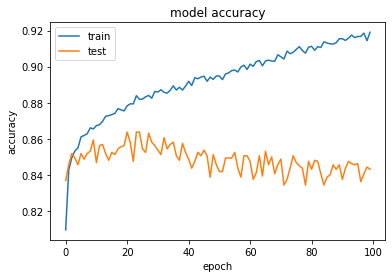

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

### Conclusion -
On the train set one can achieve higher accuracy but the accuracy on the test set is max 0.86.

In [ ]:
model2.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.4871 - accuracy: 0.8365


[0.4870552718639374, 0.8364999890327454]

### Conclusion: 
Accuracy on test set 0.84 and on the train set 0.9 so we have overfitting.

I move to the confusion matrix

In [ ]:
y_predicted2 = model2.predict(X_test)
# y_predicted for test transformation
y_pred_trans2 = []
for pred in y_predicted2:
    if pred > 0.5:
        y_pred_trans2.append(1)
    else:
        y_pred_trans2.append(0)

y_pred_trans2[0:10]

[0, 0, 0, 1, 1, 0, 0, 0, 0, 0]

Random Chance Prediction AUROC: 0.5
Model 2 Prediction AUROC: 0.7180963706387435


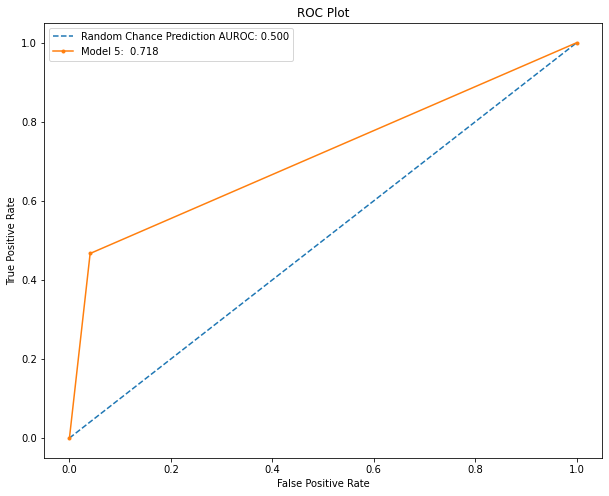

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

r_probs = [0 for _ in range(len(y_test))]
# Calculate the AUROC
r_auc = roc_auc_score(y_test, r_probs)
on_auc = roc_auc_score(y_test, y_pred_trans2)
print("Random Chance Prediction AUROC: " + str(r_auc))
print("Model 2 Prediction AUROC: " + str(on_auc))
r_fpr, r_tpr, threshold = roc_curve(y_test, r_probs)
on_fpr, on_tpr, threshold = roc_curve(y_test, y_pred_trans)
threshold[0:10]

from matplotlib.pyplot import figure

plt.figure(figsize=(10, 8))
plt.plot(
    r_fpr, r_tpr, linestyle="--", label="Random Chance Prediction AUROC: %0.3f" % r_auc
)
plt.plot(on_fpr, on_tpr, marker=".", label="Model 5:  %0.3f" % on_auc)

# TITLE
plt.title("ROC Plot")
# Axis Label
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# Legend
plt.legend()
# show plot
plt.show()

### Conclusion:

Model has some overfitting. It performs better than "random". 
But it shows that on the test set it does not perform very well. 

In another model I will add dropout.

### Model 4 (64-32-1) with dropout and early stopping 

In [ ]:
from keras.models import Sequential
from keras.layers import InputLayer
from keras.layers import Dense
from keras.layers import Dropout
from keras.constraints import maxnorm

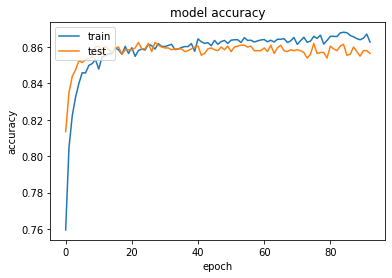

In [ ]:
# Model 3
nn_model = Sequential()
nn_model.add(
    Dense(
        64,
        kernel_regularizer=tf.keras.regularizers.l2(0.001),
        activation="relu",
        kernel_initializer="he_normal",
    )
)
nn_model.add(Dropout(rate=0.2))
nn_model.add(
    Dense(
        32,
        kernel_regularizer=tf.keras.regularizers.l2(0.001),
        activation="relu",
        kernel_initializer="he_normal",
    )
)
nn_model.add(Dropout(rate=0.1))
nn_model.add(Dense(1, activation="sigmoid"))
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    0.001, decay_steps=(X_train.shape[0] / 32) * 50, decay_rate=1, staircase=False
)


def get_optimizer():
    return tf.keras.optimizers.Adam(lr_schedule)


def get_callbacks():
    return [
        tf.keras.callbacks.EarlyStopping(
            monitor="val_accuracy", patience=70, restore_best_weights=True
        )
    ]


nn_model.compile(
    loss="binary_crossentropy", optimizer=get_optimizer(), metrics=["accuracy"]
)


historynn = nn_model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=150,
    batch_size=32,
    callbacks=get_callbacks(),
    verbose=0,
)

plt.plot(historynn.history["accuracy"])
plt.plot(historynn.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

## Conclusion: Adding dropout greately increased convergence between the train and test sets. It does not improve overall accuracy compared to the simplest neural network   above.

Dropout and simple few layer network has little overfitting.

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

r_probs = [0 for _ in range(len(y_test))]
# Calculate the AUROC
r_auc = roc_auc_score(y_test, r_probs)
on_auc = roc_auc_score(y_test, y_pred_trans_nn)
print("Random Chance Prediction AUROC: " + str(r_auc))
print("Model 2 Prediction AUROC: " + str(on_auc))
r_fpr, r_tpr, threshold = roc_curve(y_test, r_probs)
on_fpr, on_tpr, threshold = roc_curve(y_test, y_pred_trans)
threshold[0:10]

from matplotlib.pyplot import figure

plt.figure(figsize=(10, 8))
plt.plot(
    r_fpr, r_tpr, linestyle="--", label="Random Chance Prediction AUROC: %0.3f" % r_auc
)
plt.plot(on_fpr, on_tpr, marker=".", label="Model 5:  %0.3f" % on_auc)

# TITLE
plt.title("ROC Plot")
# Axis Label
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# Legend
plt.legend()
# show plot
plt.show()

NameError: ignored

In [ ]:
y_predicted_train_nn = nn_model.predict(X_train)
y_pred_train_nn = []
for pred in y_predicted_train_nn:
    if pred > 0.5:
        y_pred_train_nn.append(1)
    else:
        y_pred_train_nn.append(0)

In [ ]:
y_predicted_nn = nn_model.predict(X_test)
# y_predicted for test transformation
y_pred_trans_nn = []
for pred in y_predicted_nn:
    if pred > 0.5:
        y_pred_trans_nn.append(1)
    else:
        y_pred_trans_nn.append(0)

y_pred_trans_nn[0:10]

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

In [ ]:
confusion_matrix(y_test, y_pred_trans_nn)

array([[1548,   45],
       [ 230,  177]])

In [ ]:
cm_matrix = confusion_matrix(y_test, y_pred_trans_nn)


In [ ]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(
    cm_matrix,
    classes=["0", "1"],
    normalize=False,
    title="Neuron Network Confusion matrix",
)

TypeError: ignored

<Figure size 432x288 with 0 Axes>

### Conclusion
We have more of False Negative - so the customers who would be predicted to stay but who would leave the bank. 
So from business pointof view this model is worse. 

### Possibilitles for improvement:

One can increase precision on the train set but but then the overfitting is a problem. 

One can improve the imbalance of the classes as we start with 20% and by misclassifing at this level - the model performs rather poorly. 

### Model 5 (64-32+256-1) added another sigmoid layer

In [ ]:
model4 = Sequential()
model4.add(Dense(32, activation="relu", kernel_initializer="he_normal"))
input_layer = Dense(
    64,
    input_shape=(X_train.shape[1],),
    activation="relu",
    kernel_initializer="he_normal",
)
model4.add(input_layer)  #
hidden_layer = Dense(32, activation="relu", kernel_initializer="he_normal")
model4.add(hidden_layer)
model4.add(Dense(256, activation="sigmoid"))
model4.add(Dense(1, activation="sigmoid"))

In [ ]:
METRICS = [
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.BinaryAccuracy(name="accuracy"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.AUC(name="auc"),
    keras.metrics.AUC(name="prc", curve="PR"),  # precision-recall curve
]

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="accuracy", verbose=4, patience=10, mode="max", restore_best_weights=True
)

model4.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=METRICS,
)

In [ ]:
history4 = model4.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=200,
    validation_split=0.30,
    shuffle=True,
    callbacks=[early_stopping],
)

In [ ]:

history4.history['loss']


In [ ]:
# Plot training and validation accuracy values
plt.plot(history4.history["accuracy"])
plt.plot(history4.history["val_accuracy"])
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

# Plot training and validation accuracy values
plt.plot(history4.history["loss"])
plt.plot(history4.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

### Conclusion:
For the model here we have overfitting.  This model representsearly stopping. 
It doesnot perform as well as drop out.

But I will plot consusion matrix for this one too.

In [ ]:
y_predicted_train4 = model4.predict(X_train)
y_pred_train4 = []
for pred in y_predicted_train4:
    if pred > 0.5:
        y_pred_train4.append(1)
    else:
        y_pred_train4.append(0)
y_pred_train[0:5]

In [ ]:
y_predicted4 = model4.predict(X_test)
# y_predicted for test transformation
y_pred_trans4 = []
for pred in y_predicted4:
    if pred > 0.5:
        y_pred_trans4.append(1)
    else:
        y_pred_trans4.append(0)

y_pred_trans[0:10]

In [ ]:
# from sklearn.metrics import fbeta_score

# fbeta_score(y_test, y_pred_trans, average="weighted", beta=0.5)
# Compute confusion matrix
cm_matrix4 = confusion_matrix(y_test, y_pred_trans4)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(
    cm_matrix4,
    classes=["0", "1"],
    normalize=False,
    title="Neuron Network Confusion matrix",
)

### Conclusion:
As expected from overfitting and lower accuracy on the test set - this confusion matrix has rather poor FN,FT.

### Model 5 (64+256+1) Smaller neural  network  with 2 sigmoid layers

In [ ]:
model5 = Sequential()
model5.add(
    Dense(
        64,
        activation="relu",
        use_bias=True,
        bias_initializer="zeros",
        kernel_initializer="he_normal",
    )
)
model5.add(Dense(256, activation="sigmoid"))
model5.add(Dense(1, activation="sigmoid"))

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy', 
    verbose=4,
    patience=10,
    mode='max',
    restore_best_weights=True)

model5.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

history5 = model5.fit(X_train, y_train, 
                    epochs = 100, batch_size = 200, 
                    validation_split = 0.30, 
                    shuffle = True, callbacks=[early_stopping],)



In [ ]:
y_predicted5 = model5.predict(X_train)

In [ ]:
# y_predicted for test transformation
y_pred_trans5 = []
for pred in y_predicted5:
    if pred > 0.5:
        y_pred_trans5.append(1)
    else:
        y_pred_trans5.append(0)

y_pred_trans5[0:10]

In [ ]:
# Plot training and validation accuracy values
plt.plot(history5.history["accuracy"])
plt.plot(history5.history["val_accuracy"])
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

# Plot training and validation accuracy values
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

### Conclusion 
diference in accuracy between train and test -0.88 vs 0.85 respectively.

this was test to see if additional sigmoid layer  causes anything (not much for this data set)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

r_probs = [0 for _ in range(len(y_test))]
# Calculate the AUROC
r_auc = roc_auc_score(y_test, r_probs)
on_auc = roc_auc_score(y_test, y_pred_trans5)
print("Random Chance Prediction AUROC: " + str(r_auc))
print("One Neuron Network Prediction AUROC: " + str(on_auc))
r_fpr, r_tpr, threshold = roc_curve(y_test, r_probs)
on_fpr, on_tpr, threshold = roc_curve(y_test, y_pred_trans)
threshold[0:10]

from matplotlib.pyplot import figure

plt.figure(figsize=(10, 8))
plt.plot(
    r_fpr, r_tpr, linestyle="--", label="Random Chance Prediction AUROC: %0.3f" % r_auc
)
plt.plot(on_fpr, on_tpr, marker=".", label="Model 5:  %0.3f" % on_auc)

# TITLE
plt.title("ROC Plot")
# Axis Label
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# Legend
plt.legend()
# show plot
plt.show()

## Model 6 (1024-1024-1024) with dropout and batch normalization

In [ ]:
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization

model6 = keras.Sequential()
model6.add(Dense(1024, activation="relu", kernel_initializer="he_normal"))
model6.add(BatchNormalization())
model6.add(Dense(1024, activation="relu", kernel_initializer="he_normal"))
model6.add(Dropout(0.3))
model6.add(BatchNormalization())
model6.add(Dense(1024, activation="relu", kernel_initializer="he_normal"))
model6.add(Dropout(0.3))
model6.add(BatchNormalization())
model6.add(Dense(1, activation="sigmoid"))

<IPython.core.display.Javascript object>

In [ ]:
ETRICS = [
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.BinaryAccuracy(name="accuracy"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.AUC(name="auc"),
    keras.metrics.AUC(name="prc", curve="PR"),  # precision-recall curve
]

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="accuracy", verbose=4, patience=10, mode="max", restore_best_weights=True
)

model6.compile(optimizer="adam", loss="binary_crossentropy", metrics=METRICS)

history6 = model6.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=200,
    validation_split=0.30,
    shuffle=True,
    callbacks=[early_stopping],
)

Epoch 1/100
28/28 [==============================] - 4s 76ms/step - loss: 0.6580 - tp: 983.0000 - fp: 1345.0000 - tn: 5025.0000 - fn: 647.0000 - accuracy: 0.7510 - precision: 0.4223 - recall: 0.6031 - auc: 0.7693 - prc: 0.5157 - val_loss: 1.4625 - val_tp: 375.0000 - val_fp: 1154.0000 - val_tn: 781.0000 - val_fn: 90.0000 - val_accuracy: 0.4817 - val_precision: 0.2453 - val_recall: 0.8065 - val_auc: 0.7142 - val_prc: 0.4217
Epoch 2/100
28/28 [==============================] - 1s 39ms/step - loss: 0.4372 - tp: 679.0000 - fp: 553.0000 - tn: 3882.0000 - fn: 486.0000 - accuracy: 0.8145 - precision: 0.5511 - recall: 0.5828 - auc: 0.8176 - prc: 0.6279 - val_loss: 0.7710 - val_tp: 303.0000 - val_fp: 668.0000 - val_tn: 1267.0000 - val_fn: 162.0000 - val_accuracy: 0.6542 - val_precision: 0.3120 - val_recall: 0.6516 - val_auc: 0.7256 - val_prc: 0.4866
Epoch 3/100
28/28 [==============================] - 1s 41ms/step - loss: 0.3914 - tp: 640.0000 - fp: 370.0000 - tn: 4065.0000 - fn: 525.0000 - accu

28/28 [==============================] - 1s 41ms/step - loss: 0.2748 - tp: 677.0000 - fp: 209.0000 - tn: 4226.0000 - fn: 488.0000 - accuracy: 0.8755 - precision: 0.7641 - recall: 0.5811 - auc: 0.9208 - prc: 0.7894 - val_loss: 0.4083 - val_tp: 225.0000 - val_fp: 155.0000 - val_tn: 1780.0000 - val_fn: 240.0000 - val_accuracy: 0.8354 - val_precision: 0.5921 - val_recall: 0.4839 - val_auc: 0.8287 - val_prc: 0.6048
Epoch 21/100
28/28 [==============================] - 1s 38ms/step - loss: 0.2728 - tp: 724.0000 - fp: 213.0000 - tn: 4222.0000 - fn: 441.0000 - accuracy: 0.8832 - precision: 0.7727 - recall: 0.6215 - auc: 0.9198 - prc: 0.7970 - val_loss: 0.3977 - val_tp: 221.0000 - val_fp: 109.0000 - val_tn: 1826.0000 - val_fn: 244.0000 - val_accuracy: 0.8529 - val_precision: 0.6697 - val_recall: 0.4753 - val_auc: 0.8320 - val_prc: 0.6217
Epoch 22/100
28/28 [==============================] - 1s 39ms/step - loss: 0.2652 - tp: 740.0000 - fp: 208.0000 - tn: 4227.0000 - fn: 425.0000 - accuracy: 0.88

28/28 [==============================] - 1s 36ms/step - loss: 0.2225 - tp: 798.0000 - fp: 176.0000 - tn: 4259.0000 - fn: 367.0000 - accuracy: 0.9030 - precision: 0.8193 - recall: 0.6850 - auc: 0.9479 - prc: 0.8612 - val_loss: 0.4997 - val_tp: 244.0000 - val_fp: 177.0000 - val_tn: 1758.0000 - val_fn: 221.0000 - val_accuracy: 0.8342 - val_precision: 0.5796 - val_recall: 0.5247 - val_auc: 0.8024 - val_prc: 0.5823
Epoch 40/100
28/28 [==============================] - 1s 36ms/step - loss: 0.2149 - tp: 850.0000 - fp: 205.0000 - tn: 4230.0000 - fn: 315.0000 - accuracy: 0.9071 - precision: 0.8057 - recall: 0.7296 - auc: 0.9530 - prc: 0.8677 - val_loss: 0.4689 - val_tp: 243.0000 - val_fp: 178.0000 - val_tn: 1757.0000 - val_fn: 222.0000 - val_accuracy: 0.8333 - val_precision: 0.5772 - val_recall: 0.5226 - val_auc: 0.8178 - val_prc: 0.5891
Epoch 41/100
28/28 [==============================] - 1s 36ms/step - loss: 0.2056 - tp: 844.0000 - fp: 195.0000 - tn: 4240.0000 - fn: 321.0000 - accuracy: 0.90

28/28 [==============================] - 1s 37ms/step - loss: 0.1617 - tp: 930.0000 - fp: 161.0000 - tn: 4274.0000 - fn: 235.0000 - accuracy: 0.9293 - precision: 0.8524 - recall: 0.7983 - auc: 0.9744 - prc: 0.9208 - val_loss: 0.6075 - val_tp: 235.0000 - val_fp: 180.0000 - val_tn: 1755.0000 - val_fn: 230.0000 - val_accuracy: 0.8292 - val_precision: 0.5663 - val_recall: 0.5054 - val_auc: 0.7990 - val_prc: 0.5686
Epoch 59/100
28/28 [==============================] - 1s 36ms/step - loss: 0.1670 - tp: 938.0000 - fp: 160.0000 - tn: 4275.0000 - fn: 227.0000 - accuracy: 0.9309 - precision: 0.8543 - recall: 0.8052 - auc: 0.9720 - prc: 0.9182 - val_loss: 0.5708 - val_tp: 218.0000 - val_fp: 158.0000 - val_tn: 1777.0000 - val_fn: 247.0000 - val_accuracy: 0.8313 - val_precision: 0.5798 - val_recall: 0.4688 - val_auc: 0.8011 - val_prc: 0.5579
Epoch 60/100
28/28 [==============================] - 1s 38ms/step - loss: 0.1586 - tp: 932.0000 - fp: 126.0000 - tn: 4309.0000 - fn: 233.0000 - accuracy: 0.93

28/28 [==============================] - 1s 49ms/step - loss: 0.1155 - tp: 1010.0000 - fp: 117.0000 - tn: 4318.0000 - fn: 155.0000 - accuracy: 0.9514 - precision: 0.8962 - recall: 0.8670 - auc: 0.9869 - prc: 0.9572 - val_loss: 0.7047 - val_tp: 236.0000 - val_fp: 185.0000 - val_tn: 1750.0000 - val_fn: 229.0000 - val_accuracy: 0.8275 - val_precision: 0.5606 - val_recall: 0.5075 - val_auc: 0.7872 - val_prc: 0.5561
Epoch 78/100
28/28 [==============================] - 1s 44ms/step - loss: 0.1086 - tp: 1027.0000 - fp: 111.0000 - tn: 4324.0000 - fn: 138.0000 - accuracy: 0.9555 - precision: 0.9025 - recall: 0.8815 - auc: 0.9880 - prc: 0.9637 - val_loss: 0.7412 - val_tp: 237.0000 - val_fp: 198.0000 - val_tn: 1737.0000 - val_fn: 228.0000 - val_accuracy: 0.8225 - val_precision: 0.5448 - val_recall: 0.5097 - val_auc: 0.7844 - val_prc: 0.5487
Epoch 79/100
28/28 [==============================] - 1s 46ms/step - loss: 0.1138 - tp: 1016.0000 - fp: 111.0000 - tn: 4324.0000 - fn: 149.0000 - accuracy: 0

28/28 [==============================] - 1s 46ms/step - loss: 0.0850 - tp: 1055.0000 - fp: 80.0000 - tn: 4355.0000 - fn: 110.0000 - accuracy: 0.9661 - precision: 0.9295 - recall: 0.9056 - auc: 0.9933 - prc: 0.9770 - val_loss: 0.8411 - val_tp: 251.0000 - val_fp: 209.0000 - val_tn: 1726.0000 - val_fn: 214.0000 - val_accuracy: 0.8238 - val_precision: 0.5457 - val_recall: 0.5398 - val_auc: 0.7775 - val_prc: 0.5286
Epoch 97/100
28/28 [==============================] - 1s 50ms/step - loss: 0.0781 - tp: 1077.0000 - fp: 86.0000 - tn: 4349.0000 - fn: 88.0000 - accuracy: 0.9689 - precision: 0.9261 - recall: 0.9245 - auc: 0.9939 - prc: 0.9807 - val_loss: 0.8547 - val_tp: 235.0000 - val_fp: 203.0000 - val_tn: 1732.0000 - val_fn: 230.0000 - val_accuracy: 0.8196 - val_precision: 0.5365 - val_recall: 0.5054 - val_auc: 0.7779 - val_prc: 0.5231
Epoch 98/100
28/28 [==============================] - 1s 47ms/step - loss: 0.0787 - tp: 1079.0000 - fp: 82.0000 - tn: 4353.0000 - fn: 86.0000 - accuracy: 0.9700

<IPython.core.display.Javascript object>

In [ ]:
y_predicted6 = model6.predict(X_train)

<IPython.core.display.Javascript object>

In [ ]:
# y_predicted for test transformation
y_pred_trans6 = []
for pred in y_predicted6:
    if pred > 0.5:
        y_pred_trans6.append(1)
    else:
        y_pred_trans6.append(0)



<IPython.core.display.Javascript object>

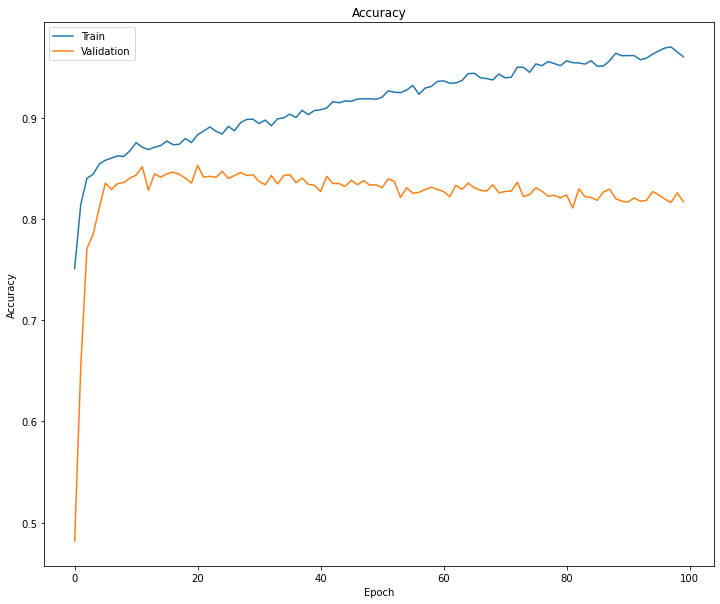

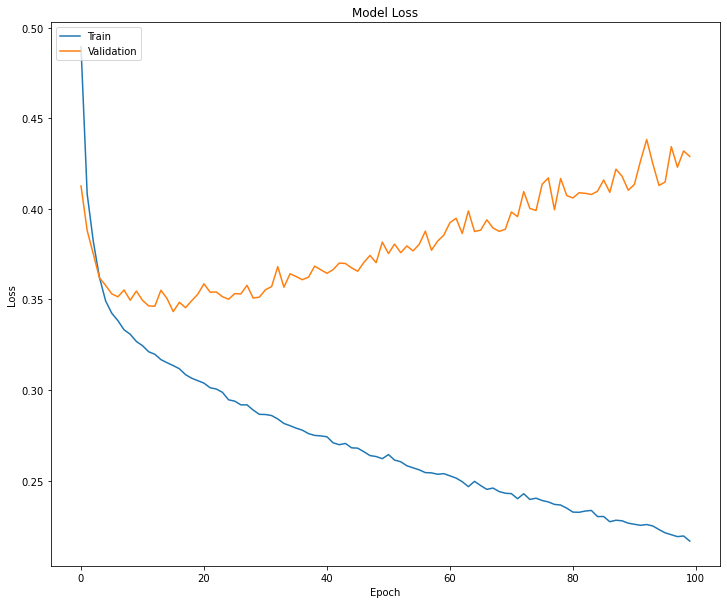

<IPython.core.display.Javascript object>

In [ ]:
# Plot training and validation accuracy values
plt.plot(history6.history["accuracy"])
plt.plot(history6.history["val_accuracy"])
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

# Plot training and validation accuracy values
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

### Conclusion: 
I have used many layers - because I wanted to see one bigger claulaction result. 
Another model that performs well on train test but is overfitting. 

Batch normalization and dropout did not improve the accuracy. 


## Final conclusions:

1) fewer dense /hidden lares  leads to better result that exceeds XGBoost.

2) Batch renormalization has small effect.

3) Dropout has rather significant effect on the results. 

The best fitted model is achieving accuracy of 0.86-0.87 on both train and test sets and uses dropout. 

## More can be done for exmaple using methods for imbalanced data sets.



## Maybe PCA or SHAP can help to select most significant features and in this way remove the noise tgether with less significant features.